# PCA는 1) 분리구분되며 2) 피처에 대한 차원축소를 같이 진행한다.

In [1]:
# from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length', 'sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF.head(3)

NameError: name 'load_iris' is not defined

In [ ]:
irisDF['target']=iris.target

In [ ]:
irisDF['target'].describe()

In [ ]:
irisDF['target'].value_counts()

In [ ]:
irisDF['target'].astype(int).plot.hist();

In [ ]:
# 2차원 시각화. X, Y축 품종 데이터 분포(0,1,2에 대해서 길이, 넓이)
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, market in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=market, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
print(irisDF.shape)  # 타겟까지 5개

# iris의 붓꽃 4가지 속성(Target 제외, Target까지 합치면 5개)을 2가지 속성으로 차원축소
## 그 전에 표준 정규 분포로 모든 속성값을 변환

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [ ]:
# 4개 속성 -> 2개 속성으로 차원축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 2가지로 차원축소?

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)   # 스케일링 된 변수 데이터
iris_pca = pca.transform(iris_scaled) # 스케일링 된 변수 데이터변환
print(iris_pca.shape)


In [ ]:
# PCA 변환된 데이터 확인
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns) # 위에 명명된 컬럼명을 irisDF_pca를 새로 만들어서 넣어줌
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

In [ ]:
print(irisDF_pca.shape)

# pca된 차트 확인

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#pca_component_1을 x축, pca_component_2를 y축으로 산점도 수행
for i, market in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1'] # target을 대상으로 산점도 표현 (1을 표현)
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=market, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')  # x축
plt.ylabel('pca_component_2') # y축
plt.show()

# pca된 데이터 변동성 확인(기존 데이터에서 얼마나 변환되었나)

In [ ]:
print(pca.explained_variance_ratio_)
print(0.76740358 +0.18282727)
# 약 95% 

# RF + cross_val_score() 3 회로 기존 데이터셋과 PCA 데이터셋의 정확도 비교

In [ ]:
# 기존 데이터셋 정확도 확인
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

In [ ]:
# PCA 데이터셋 정확도 확인

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)  # rcf 다음 데이터셋 기준이 달라진다. target은 그대로.
print(scores_pca)
print('평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

# 일반적으로 PCA 변환된 데이터 세트가 원본 데이터 세트보다 더 나은 예측 정확도를 나타내는 경우는 흔하지 않다.
## 대부분 PCA 변환 차원 개수에 따라 예측 성능이 떨어진다.
### 위의 붓꽃데이터는 4개 속성이 2개 변환 속성 돼도 예측 성능에 전혀 영향을 받지 않을 정도로 변환이 잘 된 케이스.
#### 물론 이는 변환되는 피쳐수가 많아질 수록 정확도가 떨어진다.

# K-means를 이용한 붓꽃 군집화(Clustering)

In [4]:
# KMeans의 파라미터값 *******************************************************************************
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                            precompute_distances='auto', verbose=0, random_state=None,
                            copy_x=True, n_jobs=1, algorithm='auto')
# KMeans의 파라미터값 *******************************************************************************

SyntaxError: invalid syntax (<ipython-input-4-4b1f5a0a1fbc>, line 2)

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# Kmeans를 이용해 3개 그룹으로 군집화.

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)

In [6]:
# 각각 것들이 0,1,2 형식으로 클러스터링 되었음을 확인
print(kmeans.labels_) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [10]:
# 단순히 이 행위만으로 irisDF 데이터셋에 추가된다.
irisDF['cluster']=kmeans.labels_

In [9]:
print(irisDF)

     sepal_length  sepal_width  petal_length  petal_width  cluster
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        0
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        0
148           6.2          3.4           5.4          2.3        0
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [12]:
# 아래코드로 군집화 확인 결과, 0은 50개 전부 군집화 완료.  1은 0과 2로 나뉘어서 군집화, 2는 0과 2로 나뉘어서 군집화

irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


# 군집화를 차트로 시각화준비
-> 붓꽃 데이터 세트 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원축소

In [14]:
# 4개 세트를 2개로 차원축소. 2차원 평면에 그리기 위한 준비
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


# 군집화를 차트로 시각화. 각 인덱스 추출해 분류

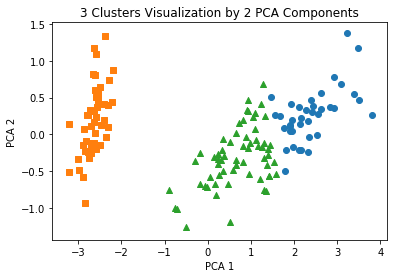

In [20]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출. 마커별로 별도의 산점도를 수행.
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

# 0이 네모('S')로 명확히 구분됨. 나머지는 속성의 위치 자체가 명확히 분리되기 어렵다.

## Clustering 알고리즘 테스트를 위한 데이터 생성 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [22]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


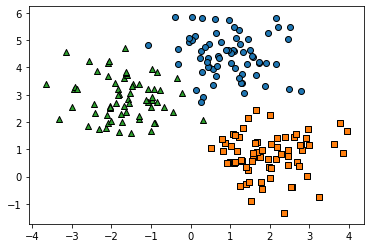

In [23]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

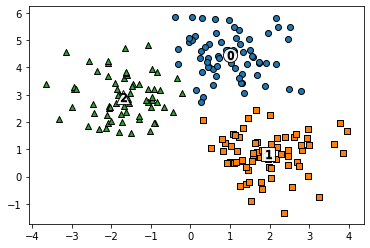

In [25]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [26]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64
